Installation

Imports

In [2]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt


Read image

reading as grayscale


In [3]:
ipath = "TeamsLogo.jpeg"
image = cv2.imread("TeamsLogo.jpeg",cv2.IMREAD_GRAYSCALE)
cv2.imshow("IMG",image)
#cv2.imshow("gray img",grayimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


(225, 225, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


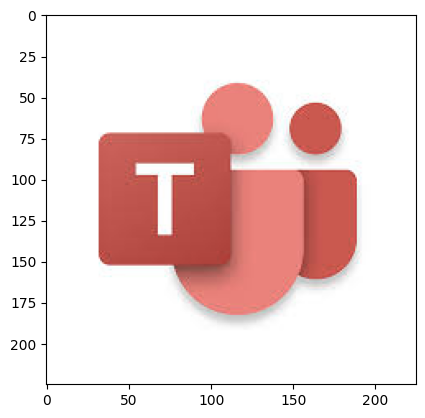

In [5]:
#read color
import matplotlib.pyplot as plt
clr =  cv2.imread(ipath,cv2.IMREAD_COLOR)
dispImg=plt.imshow(clr)
print(clr.shape)
print(clr)

Matplotlib reads as BGR so required color conversion to RGB

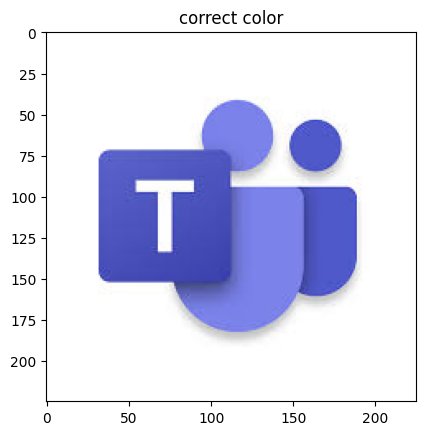

In [6]:
crtClr = cv2.cvtColor(clr,cv2.COLOR_RGB2BGR)
plt.imshow(crtClr)
plt.title('correct color')
plt.show()

Shape

In [7]:
x=image.shape
x

(225, 225)

Resize

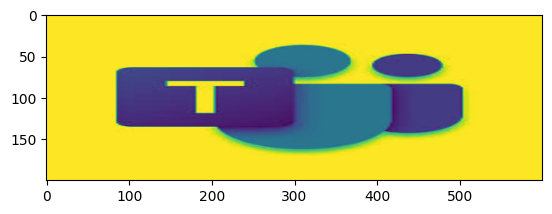

In [8]:
nd = (600,200)
resized=cv2.resize(image,nd)
plt.imshow(resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
image.shape

(225, 225)

In [10]:
"""cv2.imshow("BGR",image)
colorImg=cv2.cvtColor(ipath,cv2.COLOR_RGB2BGR)
cv2.imshow("color",colorImg)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

'cv2.imshow("BGR",image)\ncolorImg=cv2.cvtColor(ipath,cv2.COLOR_RGB2BGR)\ncv2.imshow("color",colorImg)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

Random image

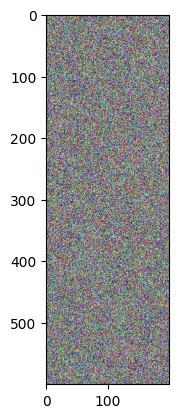

In [11]:
from PIL import Image
import numpy as np
x=np.random.randint(0,256,(600,200,3),dtype=np.uint8)
#x
plt.imshow(x)

Save the image

In [12]:
fpng='savepng.png'
cv2.imwrite(fpng,x)

True

In [13]:
fjpg="savejpg.jpeg"
cv2.imwrite(fjpg,x)

True

Aspect Ratio

In [14]:
(w,h)=x.shape[:2]
(w,h)

(600, 200)

(800.034, 267.0)
(800, 267)


(800, 267, 3)

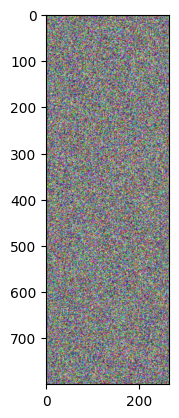

In [15]:
y=float(w)*1.33339,float(h)*1.335
print(y)

z=int(float(w)*(800/float(w))), int(float(h)*(267/float(h)))
print(z)

resize2=cv2.resize(x, z[::-1])
plt.imshow(resize2)
resize2.shape


Alternative

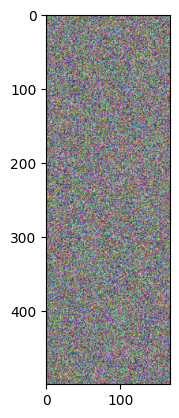

In [16]:
o_w = 200
o_h = 600
asr = o_w/o_h
h = 500
w = round(h * asr)
plt.imshow(cv2.resize(x, (w, h)))

Video Live stream

In [17]:
cam=cv2.VideoCapture(0)

[ WARN:0@33.720] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0@33.721] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@33.725] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [18]:
'''while True:
    ret, frame = cam.read()
    if not ret:
        print("Frame not available")
        break
    #f = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    cv2.imshow("frame",frame)
    cv2.imwrite('Day1(1).png',frame)

    if cv2.waitKey(1) == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()
'''
# cv2.cvt_color
# plt.imshow(frame)


'while True:\n    ret, frame = cam.read()\n    if not ret:\n        print("Frame not available")\n        break\n    #f = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)\n    cv2.imshow("frame",frame)\n    cv2.imwrite(\'Day1(1).png\',frame)\n\n    if cv2.waitKey(1) == ord(\'q\'):\n        break\ncam.release()\ncv2.destroyAllWindows()\n'

Edge detection


In [19]:
#Sobel Operator
sobelHorz= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print("sobel:",sobelHorz)
a2=np.array([[1,1,1],[1,1,1],[1,1,1]])
print("a2: ",a2)

#print("a1.a2: ", np.dot(sobelHorz,a2))


sobel: [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
a2:  [[1 1 1]
 [1 1 1]
 [1 1 1]]


Read colour image and create ones of same shape as image

148 210
(148, 210, 3)


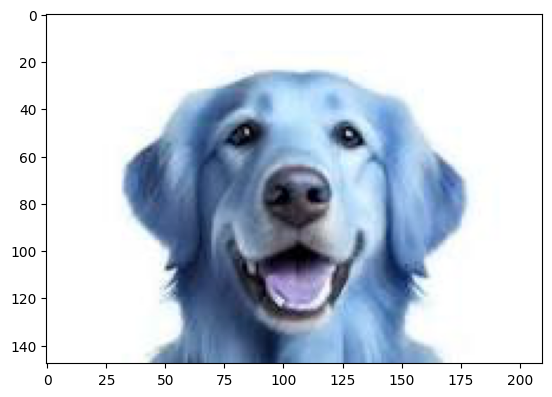

In [22]:
dogimg= cv2.imread("Dog.jpeg",cv2.IMREAD_COLOR)
plt.imshow(dogimg)
#print(dogimg)
(h,w)=dogimg.shape[:2]
print(h,w)

dummy= np.ones_like(dogimg)
#print(dummy)
print(dummy.shape)

Padding

In [23]:
paded=np.pad(dogimg, pad_width=1)

Plus shaped image Sobel operation

100/2 = 50.0 (float)

100//2=50

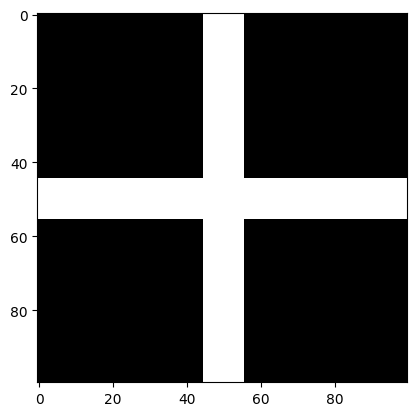

In [24]:
import numpy as np
img = np.zeros((100, 100))
h, w = img.shape
# img[h//2, w//2 - 5 : w//2 + 5] = 255
# img[h//2 - 5 : h//2 + 5, w//2] =255
img[:,45:56]=255
img[45:56,:]=255

sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
newimgx = convolve2d(img,sobelx)
newimgy = convolve2d(img,sobely)


plt.imshow(img, cmap='gray')
# plt.imshow(newimgx, cmap= "gray") #horizontal Gx
# plt.imshow(newimgy,cmap='gray') #Vertical Gy


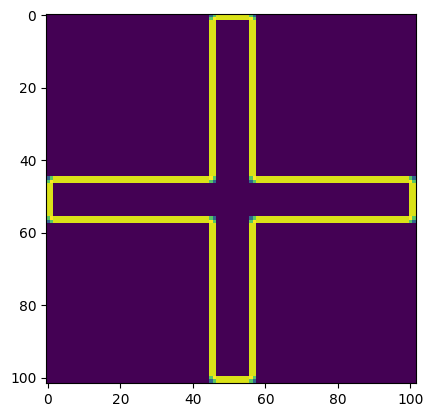

In [25]:
#addition of x and y 
# z=newimgx + newimgy
# plt.imshow(z)

#sqrt
z = np.sqrt(newimgx**2 + newimgy**2)
plt.imshow(z)

Diagonal line in plus

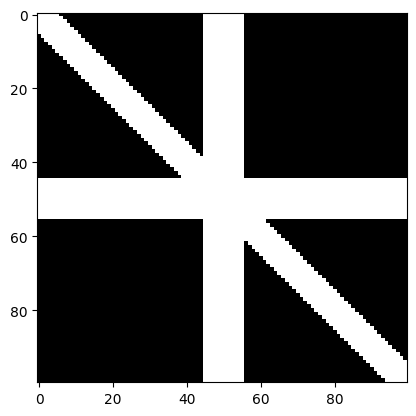

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty image
img = np.zeros((100, 100))

h, w = img.shape
# img[h//2, w//2 - 5 : w//2 + 5] = 255
# img[h//2 - 5 : h//2 + 5, w//2] =255
img[:,45:56]=255
img[45:56,:]=255

# Define the width of the line
line_width = 10

# Loop to draw the thick diagonal line from (0, 10) to (90, 90)
for i in range(0, 100):  # Loop from 0 to 90 to cover the diagonal
    # Define the range of pixels to cover the 10-pixel width
    for j in range(i - line_width//2, i + line_width//2 + 1):

        if 0 <= j < 100 and 0 <= i < 100:
            img[j, i] = 255  # Mark the pixel white
            #img[i, j] = 200

# Display the image
plt.imshow(img, cmap='gray')
plt.show()

Sobel operator applied on digonal and plus

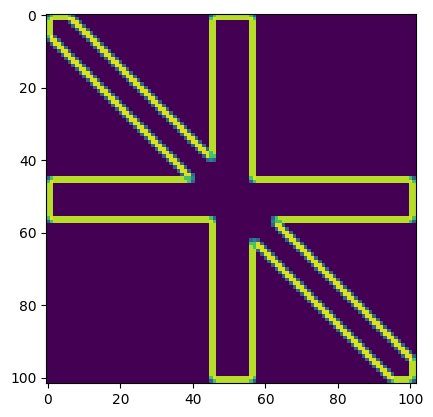

In [27]:
sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
newimgx = convolve2d(img,sobelx)
newimgy = convolve2d(img,sobely)

mag = np.sqrt(newimgx**2 + newimgy**2)
plt.imshow(mag)

Sobel function

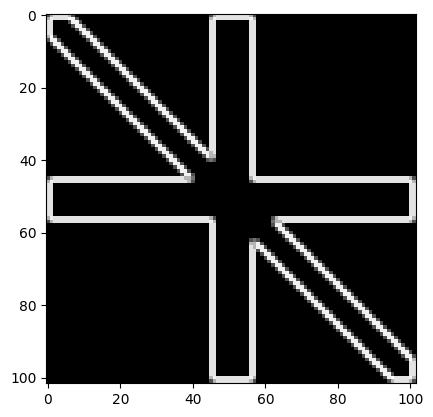

array([[ 360.62445841,  806.38080334, 1020.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 806.38080334, 1081.87337522, 1020.        , ...,    0.        ,
           0.        ,    0.        ],
       [1020.        , 1020.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        1020.        , 1020.        ],
       [   0.        ,    0.        ,    0.        , ..., 1020.        ,
        1081.87337522,  806.38080334],
       [   0.        ,    0.        ,    0.        , ..., 1020.        ,
         806.38080334,  360.62445841]], shape=(102, 102))

In [30]:
def sobel(img, show = True):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    newimgx = convolve2d(img,sobelx)
    newimgy = convolve2d(img,sobely)
    magnitude = np.sqrt(newimgx**2 + newimgy**2)
    if show:
        plt.imshow(magnitude, cmap='gray')
        plt.show()
    return magnitude


sobel(img, True)

Thresholding

(148, 210, 3)


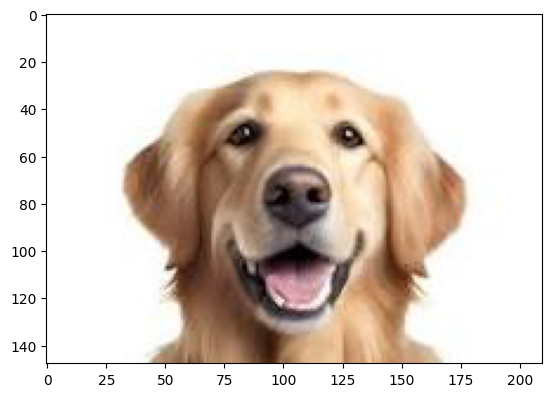

In [36]:
img1 = cv2.imread("Dog.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
print(img1.shape)

RGB2GRAY

(148, 210)

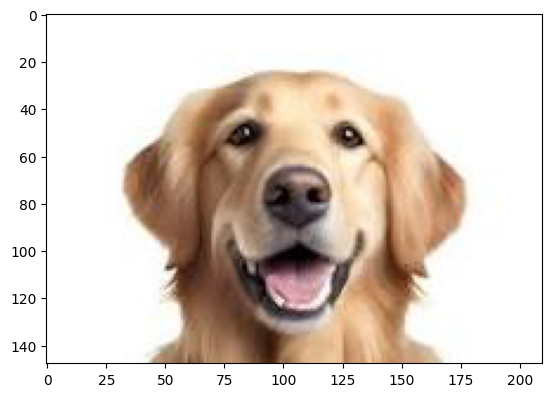

In [37]:
img2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(img1, cmap='gray')
img2.shape

bgr2gray

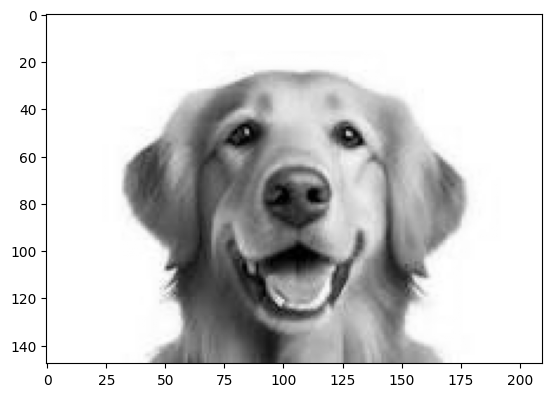

In [38]:
grayDog = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(grayDog, cmap = 'gray')
(h,w) = img1.shape[:2]

Image pixel intensity retrival

In [39]:
for i in range(h):
        for j in range(w):
                pixel_intensity = img1[i, j]  # Get the pixel intensity
                print(i,j, " " ,pixel_intensity)

0 0   [255 255 255]
0 1   [255 255 255]
0 2   [255 255 255]
0 3   [255 255 255]
0 4   [255 255 255]
0 5   [255 255 255]
0 6   [255 255 255]
0 7   [255 255 255]
0 8   [255 255 255]
0 9   [255 255 255]
0 10   [255 255 255]
0 11   [255 255 255]
0 12   [255 255 255]
0 13   [255 255 255]
0 14   [255 255 255]
0 15   [255 255 255]
0 16   [255 255 255]
0 17   [255 255 255]
0 18   [255 255 255]
0 19   [255 255 255]
0 20   [255 255 255]
0 21   [255 255 255]
0 22   [255 255 255]
0 23   [255 255 255]
0 24   [255 255 255]
0 25   [255 255 255]
0 26   [255 255 255]
0 27   [255 255 255]
0 28   [255 255 255]
0 29   [255 255 255]
0 30   [255 255 255]
0 31   [255 255 255]
0 32   [255 255 255]
0 33   [255 255 255]
0 34   [255 255 255]
0 35   [255 255 255]
0 36   [255 255 255]
0 37   [255 255 255]
0 38   [255 255 255]
0 39   [255 255 255]
0 40   [255 255 255]
0 41   [255 255 255]
0 42   [255 255 255]
0 43   [255 255 255]
0 44   [255 255 255]
0 45   [255 255 255]
0 46   [255 255 255]
0 47   [255 255 255]
0 

Array, numpy, channel

In [40]:
a=np.zeros((3,100,100))

In [41]:
a

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], shape=(3, 100, 100))

In [42]:
a.shape

(3, 100, 100)

In [43]:
a1 = np.array([[[1,2,3],[4,5,6]],[[2,4,5],[7,8,9]]])
a1

array([[[1, 2, 3],
        [4, 5, 6]],

       [[2, 4, 5],
        [7, 8, 9]]])

In [44]:
a1[0,:,:] = 255
a1

array([[[255, 255, 255],
        [255, 255, 255]],

       [[  2,   4,   5],
        [  7,   8,   9]]])

In [45]:
arr1 = np.empty((2,2,3))
arr1.shape

(2, 2, 3)

In [46]:
arr1[0,:,:]=255
arr1

array([[[2.55000000e+002, 2.55000000e+002, 2.55000000e+002],
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002]],

       [[2.94952934e+179, 1.00606973e-046, 2.25285045e+184],
        [2.67942357e+184, 2.21396588e+160, 3.85404558e-057]]])

In [47]:
arr1[0,:,:].shape

(2, 3)

In [48]:
d3 = np.empty((3,3,3), dtype = np.uint8)
d3

array([[[ 11, 143, 107],
        [ 37,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0, 235]],

       [[202,  37,   0],
        [  0,   0,   0],
        [176,  95,   1]]], dtype=uint8)

In [49]:
d3[0,:,0] # 0th channel/layer; entire row(:); 0th column 159, 32, 0;

array([11, 37,  0], dtype=uint8)

In [50]:
d3[1,2,1] # channel 1(2), row2(3), col1(2)

np.uint8(0)

In [51]:
d3[0,:,1] #0th channel, entire row , 1(2nd)column

array([143,   0,   0], dtype=uint8)

In [52]:
d3[2,2,:] #3rd channel, 3rd row, entire column

array([176,  95,   1], dtype=uint8)

In [53]:
d3_1 = np.empty((3,4,5), dtype = np.uint8)
d3_1

array([[[54, 13,  3, 38,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]]], dtype=uint8)

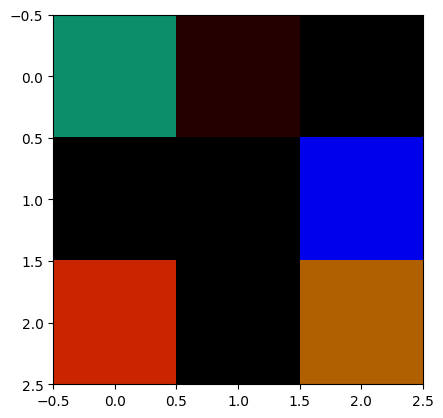

In [54]:
plt.imshow(d3)

In [55]:
d3[2, 2, :]

array([176,  95,   1], dtype=uint8)

In [56]:
d3[:,:,0].shape

(3, 3)

(148, 210, 3)

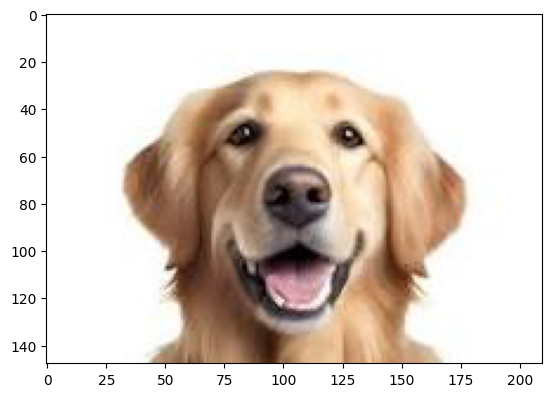

In [58]:
img3= cv2.imread("Dog.jpeg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3) #color img
img3.shape #(148, 210, 3)
#plt.imshow(img3[:,:,0], cmap = "gray") #in gray

Black to red image processing

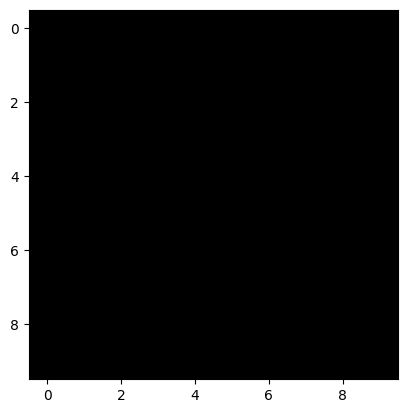

In [59]:
#black image
redImg = np.zeros((10,10,3))
plt.imshow(redImg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


True

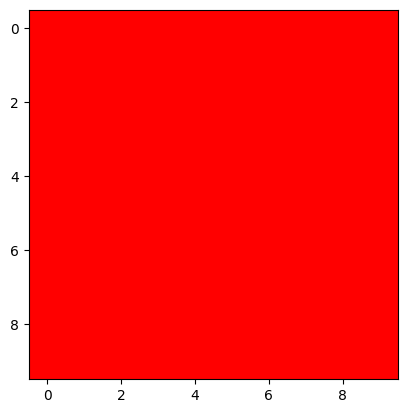

In [60]:
redImg[:,:,0] = 255
plt.imshow(redImg)
cv2.imwrite("redImg.png", redImg)

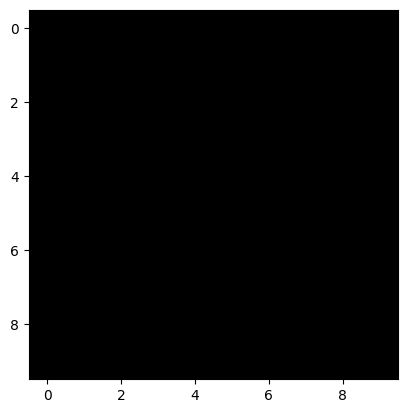

In [61]:
plt.imshow(redImg[:,:,0], cmap = 'gray') #black o/p
plt.imshow(redImg[:,:,1], cmap ="gray") #black o/p
plt.imshow(redImg[:,:,2], cmap="gray") #black o/p

In [63]:
redIm = cv2.imread("redImg.png")
#redIm[:,:,0]
cv2.imwrite("redIm_Red.png", redIm[:,:,0])
cv2.imwrite("redImage_Green.png", redIm[:,:,1])
cv2.imwrite("redImage_Blue.png", redIm[:,:,2])

True

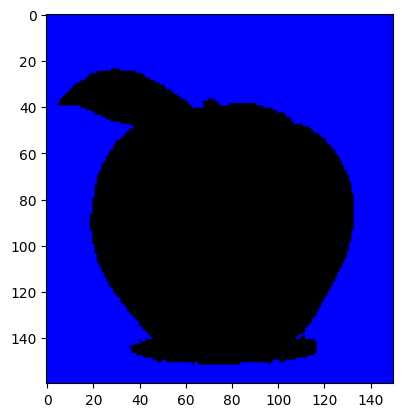

In [64]:
apple = cv2.imread("apple.jpeg")
apple.shape
apple= apple[:,:150]
x = np.where(apple > 230, [0,0,255],0) #blue background
plt.imshow((x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-24..255].


dtype('int64')

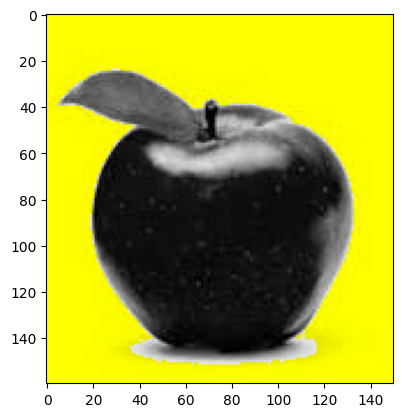

In [65]:
cv2.imwrite("appleBlueBg.jpg", apple-x)
plt.imshow(apple-x) # subtraction of blue background with original image
(apple-x).dtype

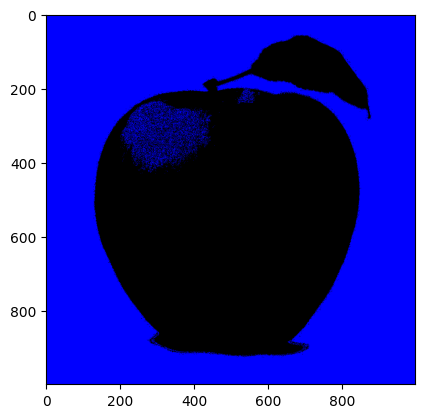

In [66]:
x1 = cv2.imread("appleClr.jpg")
#plt.imshow(x1)
thr = np.where(x1==255,[0,0,255],0) #white to blue
plt.imshow(thr)

Thresholding Function

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1000, 998), dtype=uint8)

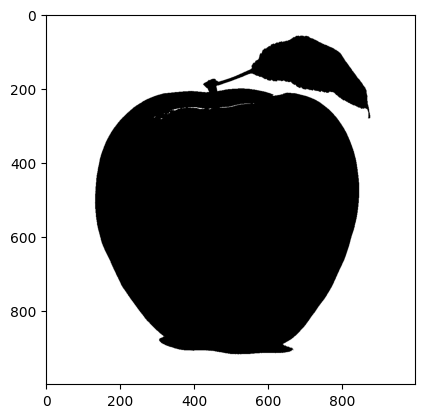

In [69]:
def thrshld(src, thr, maxVal, minVal):
    if "/" not in src:
        imgrd = src
    else:
        imgrd = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
        bin_img = np.where(imgrd > thr, maxVal, minVal).astype(np.uint8)
        plt.imshow(bin_img, cmap="gray")
    return bin_img

thrshld("/home/dhvani/Subhiksha/Opencv/Image_Fundamentals/appleClr.jpg",230,255,0)


Contour => thresholding + countour

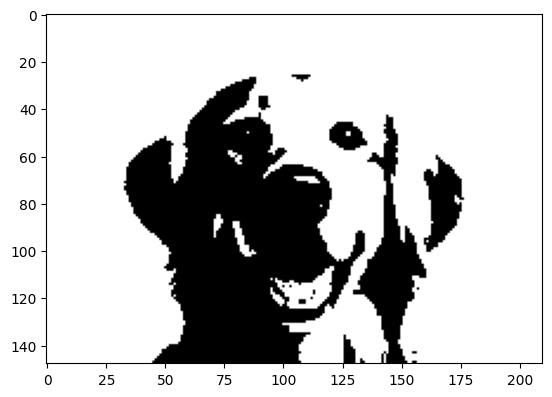

In [71]:
dog_img = cv2.imread("Dog.jpeg", cv2.IMREAD_GRAYSCALE)

x = np.where(dog_img>167, 255,0) # threshold without binary function
plt.imshow((x), cmap="gray")

#bin_Img=thrshld("/home/dhvani/Subhiksha/Opencv/Dog.jpeg", 160,255,0)# with usage of binary function

Contour function

binary_img == 255
This converts the binary image into a boolean mask:

True (1) where pixel is white (255)

False (0) where pixel is black (0)

So now you have a 2D boolean array.

label(..., structure=...)
This is from scipy.ndimage.label(), which does:

Finds all connected "True" regions in a boolean array.

Assigns each connected region a unique integer label.

Returns:

labeled: 2D array same size as input, with 0 for background and integers 1, 2, 3, ... for each object

num_features: total number of detected components (regions/blobs)



Crop image

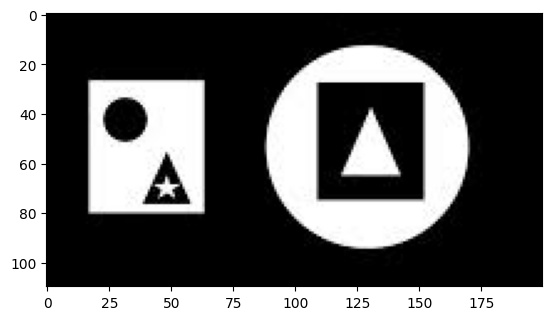

In [75]:
src="/home/dhvani/Subhiksha/Opencv/shapes.jpeg"
img2 = cv2.imread(src)
crp = img2[10:120,0:200]
cv2.imwrite("cropped_shapes.jpeg", crp)
plt.imshow(crp)

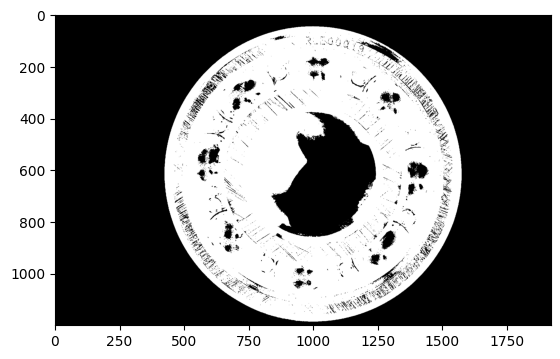

In [79]:
#ball bearing color & copy

src = "/home/dhvani/Subhiksha/Opencv/Image_Fundamentals/Ballbearing_50l.png"
bb_color = cv2.imread(src)
#plt.imshow(bb_color)

bb_color_cpy = bb_color.copy()
bb_gray = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
#blur = cv2.GaussianBlur(bb_gray, (5, 5), 0)
binThr = thrshld(src=src,thr=170,maxVal=0,minVal=255)

Contour with area > 40000

In [80]:
contours,h= cv2.findContours(binThr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
new_h = []
new_c = []
#print("outer: ",len(contours))
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
 #   print("inside: ",len(contours))
    if area  > 40000:
        #new_h.append(h[i])
        new_h.append(h[0][i])
        new_c.append(c)

print("h: ", len(h),"new h: ", len(new_h) )
#print(len(contours))
# bb_color_cpy = bb_color.copy()
# cv2.drawContours(bb_color_cpy, contours, -1, (0, 255, 0), 10)
# plt.imshow(cv2.cvtColor(bb_color_cpy, cv2.COLOR_BGR2RGB))

h:  1 new h:  2


In [81]:
print(new_h)

print("H: ",h.shape )

print(h[0][4947])

[array([3550, 3548,   -1,   -1], dtype=int32), array([  -1, 4946,   -1,   -1], dtype=int32)]
H:  (1, 4948, 4)
[  -1 4946   -1   -1]


h.shape == (1, 4948, 4) means:


1	- Only 1 hierarchy list (OpenCV gives hierarchy as shape (1, N, 4))

4948	- Total number of contours

4	- Each contour's: [Next, Previous, First_Child, Parent]

In [82]:
l1 = [1,2,3,4,5]
for i in l1:
    print(i)
    print(l1)
i

1
[1, 2, 3, 4, 5]
2
[1, 2, 3, 4, 5]
3
[1, 2, 3, 4, 5]
4
[1, 2, 3, 4, 5]
5
[1, 2, 3, 4, 5]


5

1689


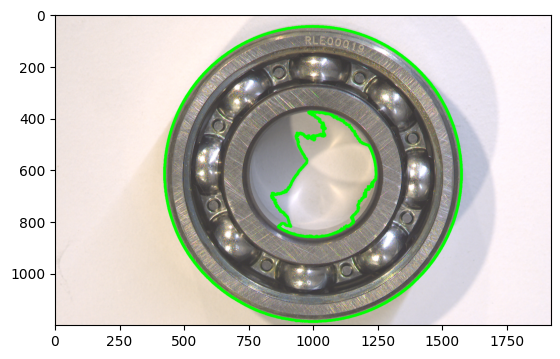

In [83]:
contours,h= cv2.findContours(binThr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
new_h = []
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area  > 40000:
        new_h.append(contour)
print(len(contour))
bb_color_cpy = bb_color.copy()
cv2.drawContours(bb_color_cpy, new_h, -1, (0, 255, 0), 10)
plt.imshow(cv2.cvtColor(bb_color_cpy, cv2.COLOR_BGR2RGB))

In [84]:
len(new_h)

2

In [85]:
h

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [4946, 4944,   -1,   -1],
        [4947, 4945,   -1,   -1],
        [  -1, 4946,   -1,   -1]]], shape=(1, 4948, 4), dtype=int32)

In [86]:
len(contours)

4948

In [87]:
contours[1]

array([[[1055, 1157]],

       [[1056, 1156]],

       [[1057, 1157]],

       [[1056, 1158]]], dtype=int32)

In [88]:
1689, 3305

(1689, 3305)

mode

RETR_EXTERNAL	    Only outermost contours

RETR_LIST
-All contours, no hierarchy

RETR_CCOMP
-Outer + holes (2 levels)

RETR_TREE
-Full hierarchy tree

method
CHAIN_APPROX_SIMPLE
-Approximate (fewer points)

CHAIN_APPROX_NONE
-All points (no compression)

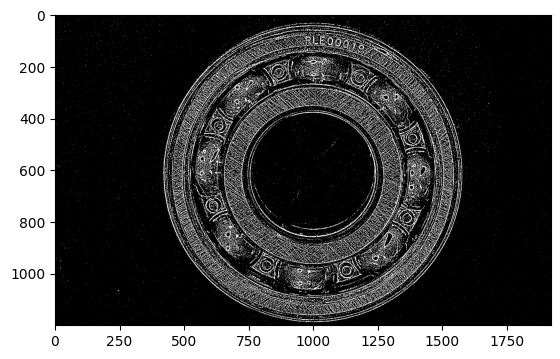

In [89]:
binary = cv2.adaptiveThreshold(
    bb_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # or MEAN_C
    cv2.THRESH_BINARY,  # or THRESH_BINARY depending on object color
    blockSize=11,
    C=-2
)

plt.imshow(binary, cmap="gray")

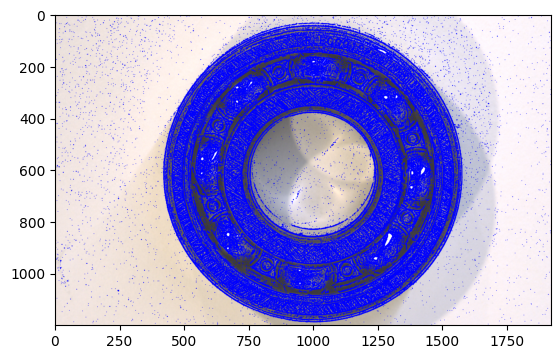

In [90]:
contours, Hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(bb_color, contours, -1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(bb_color, cv2.COLOR_BGR2RGB))


In [91]:
len(contours[100])

2

In [92]:
contours

(array([[[1455, 1197]]], dtype=int32),
 array([[[1375, 1197]]], dtype=int32),
 array([[[1025, 1197]]], dtype=int32),
 array([[[1673, 1196]]], dtype=int32),
 array([[[ 895, 1196]],
 
        [[ 895, 1197]]], dtype=int32),
 array([[[ 832, 1195]],
 
        [[ 832, 1196]]], dtype=int32),
 array([[[ 772, 1195]]], dtype=int32),
 array([[[ 725, 1195]]], dtype=int32),
 array([[[ 628, 1195]],
 
        [[ 627, 1196]]], dtype=int32),
 array([[[1467, 1193]]], dtype=int32),
 array([[[ 883, 1193]],
 
        [[ 884, 1193]]], dtype=int32),
 array([[[ 694, 1193]]], dtype=int32),
 array([[[ 580, 1193]]], dtype=int32),
 array([[[ 502, 1193]]], dtype=int32),
 array([[[ 387, 1193]]], dtype=int32),
 array([[[1869, 1192]]], dtype=int32),
 array([[[ 610, 1192]]], dtype=int32),
 array([[[1297, 1191]]], dtype=int32),
 array([[[1140, 1191]]], dtype=int32),
 array([[[ 483, 1191]]], dtype=int32),
 array([[[ 146, 1191]]], dtype=int32),
 array([[[ 819, 1190]]], dtype=int32),
 array([[[ 627, 1189]]], dtype=int32),

Erosion

In [93]:
src = "/home/dhvani/Subhiksha/Opencv/binthr ballbearing.png"
bb_thresholded = cv2.imread(src)
#plt.imshow(bb_color)

# bb_color_cpy = bb_color.copy()
# bb_gray = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
# #blur = cv2.GaussianBlur(bb_gray, (5, 5), 0)
# binThr = thrshld(src=src,thr=170,maxVal=0,minVal=255)

In [94]:

erosion = cv2.erode(bb_thresholded,)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'erode'
> Overload resolution failed:
>  - erode() missing required argument 'kernel' (pos 2)
>  - erode() missing required argument 'kernel' (pos 2)


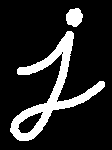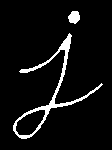 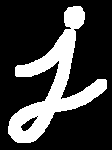

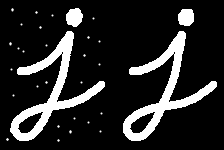 Opening is just another name of erosion followed by dilation. It is useful in removing noise,

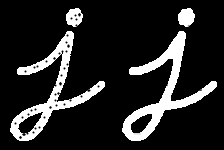 Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

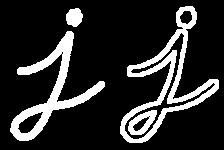 It is the difference between dilation and erosion of an image. The result will look like the outline of the object.

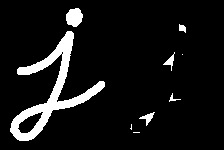It is the difference between the closing of the input image and input image.



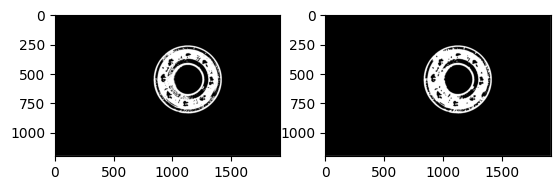

array([[  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1200, 1920), dtype=uint8)

In [95]:
def morph(type, src, row, col, iter):
    img = cv2.imread(src,cv2.IMREAD_GRAYSCALE)
    kernel = np.ones((row,col),np.uint8)
    if type == "erosion":
        mrph = cv2.erode(img,kernel,iter)
    elif type == "dilation":
        mrph = cv2.dilate(img, kernel, iter)
    elif type == "open":
        mrph =  cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    elif type == "close":
        mrph = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    elif type == "gradiant":
        mrph = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    elif type == "tophat":
        mrph = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel) #It is the difference between input image and Opening of the image.
    elif type == "blackhat":
        mrph = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)#It is the difference between the closing of the input image and input image.



    plt.subplot(1,2,1)
    plt.imshow(img, cmap = "gray")
    plt.subplot(1,2,2)
    plt.imshow(mrph, cmap = "gray")
    plt.show()
    return mrph

morph("close",src, 5,5, 2 )

In [ ]:
src = "/home/dhvani/Subhiksha/Opencv/16mm_dome_light_ballBearing27k.png"
img = cv2.imread(src,cv2.IMREAD_GRAYSCALE)
cedge = cv2.Canny(img,100,200)
sedge = sobel(img, False)
kernel = np.ones((5,5),np.uint8)
mrph = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# plt.figure(figsize=(16, 5)) 

# plt.title("Canny")
# plt.subplot(1,4,2)
# plt.imshow(cedge, cmap ="gray")

# plt.title("Sobel")
# plt.subplot(1,4,3)
# plt.imshow(sedge, cmap ="gray")

# plt.title("Mrph")
# plt.subplot(1,4,4)
# plt.imshow(mrph, cmap ="gray")

# plt.tight_layout() 
# plt.show()

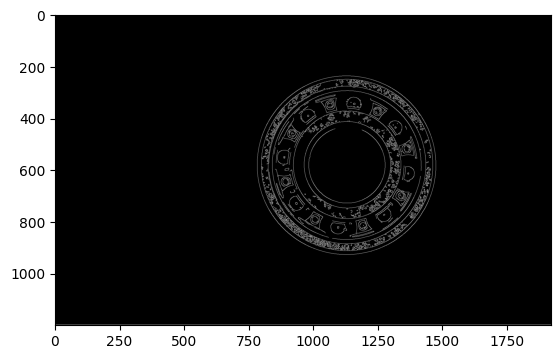

In [97]:
plt.imshow(cedge, cmap ="gray")

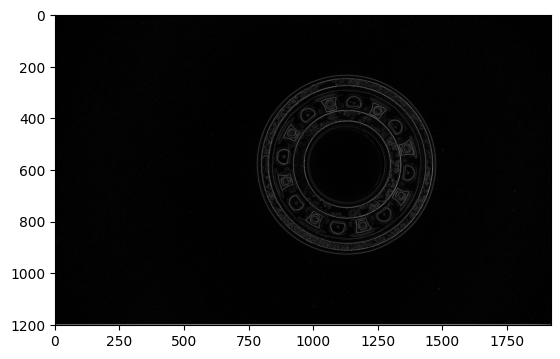

In [98]:
plt.imshow(sedge, cmap ="gray")

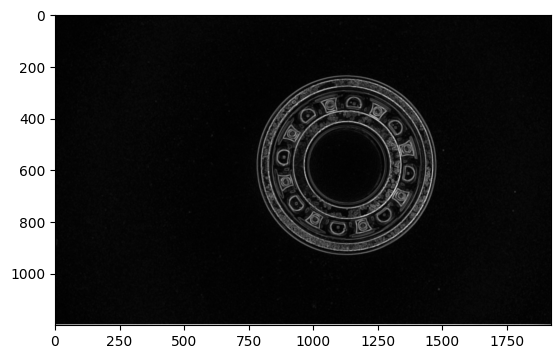

In [99]:
plt.imshow(mrph, cmap ="gray")